# Lab assigment 1

*   Vinay Sanga
*   Md Masum Billah
*   Ammara Asif




## Step 1: Webscraping and Step 2: Filtering intersting data

In [1]:
#Imports
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
from PIL import Image
from io import BytesIO
from IPython.display import display

In [2]:
#Parse the given post and fetches out the fields as described in step 2 of the assignment
def parse_recipe_entry(post):
  name = post.h2.text
  image = post.find('img')['src']
  post_page = BeautifulSoup(requests.get(post.find('a')['href']).text, 'lxml')
  calories_tag = post_page.select_one('span.wprm-nutrition-label-text-nutrition-container-calories > span.wprm-nutrition-label-text-nutrition-value')
  calories = 0 if(calories_tag is None) else calories_tag.text
  personal_points_tag = post_page.select_one('span.recipe-ww-pp')
  personal_points = 0 if(personal_points_tag is None) else personal_points_tag.text
  summary = post_page.select_one('div.wprm-recipe-summary').text
  recipe_keys_tag = post_page.select_one('ul.recipe-type-post-icons').find_all('a')
  recipe_keys = ', '.join(map(lambda e : e['title'], recipe_keys_tag))
  return (name, image, calories, personal_points, summary, recipe_keys)

In [3]:
#Parse individual pages and get the posts
def parse_page(page):
  source = requests.get(f'https://www.skinnytaste.com/recipe-index/?_paged={page}').text
  soup = BeautifulSoup(source, 'lxml')
  posts = soup.select('div.post-content.ast-grid-common-col:has(div.wprm-time-container)')
  return tuple(map(parse_recipe_entry, posts))

In [4]:
#Writing the pages to the csv file
with open('/content/Recipes.csv', 'w') as csv_file:
  csv_writer = csv.writer(csv_file)
  csv_writer.writerow(['name', 'image', 'calories', 'personal_points', 'summary', 'recipe_keys']) # Header row
  for page_num in range(1, 31):
    print(f"Writing page {page_num}...")
    csv_writer.writerows(parse_page(page_num))

Writing page 1...
Writing page 2...
Writing page 3...
Writing page 4...
Writing page 5...
Writing page 6...
Writing page 7...
Writing page 8...
Writing page 9...
Writing page 10...
Writing page 11...
Writing page 12...
Writing page 13...
Writing page 14...
Writing page 15...
Writing page 16...
Writing page 17...
Writing page 18...
Writing page 19...
Writing page 20...
Writing page 21...
Writing page 22...
Writing page 23...
Writing page 24...
Writing page 25...
Writing page 26...
Writing page 27...
Writing page 28...
Writing page 29...
Writing page 30...


In [5]:
data=pd.read_csv('/content/Recipes.csv')

In [6]:
data

,name,image,calories,personal_points,summary,recipe_keys
0,Pumpkin Chocolate Chip Cookies,https://www.skinnytaste.com/wp-content/uploads...,95.0,5,"These soft Pumpkin Chocolate Chip Cookies, mad...","Kid Friendly, Under 30 Minutes, Vegetarian Meals"
1,Coconut Curry Butternut Squash Soup,https://www.skinnytaste.com/wp-content/uploads...,108.0,2,"Coconut milk, curry and Indian spices complime...","Dairy Free, Gluten Free, Under 30 Minutes, Veg..."
2,Pumpkin Bread Recipe,https://www.skinnytaste.com/wp-content/uploads...,103.0,5,Warm up your kitchen with the scent of pumpkin...,"Dairy Free, Vegetarian Meals"
3,Roasted Broccoli and Cauliflower,https://www.skinnytaste.com/wp-content/uploads...,163.0,4,This easy sheet pan roasted broccoli and cauli...,"Gluten Free, Kid Friendly, Under 30 Minutes"
4,Pumpkin Baked Oatmeal Cups,https://www.skinnytaste.com/wp-content/uploads...,104.0,2,"These creamy, pumpkin baked oatmeal cups are p...","Freezer Meals, Gluten Free, Meal Prep Recipes,..."
...,...,...,...,...,...,...
559,Flourless Chocolate Zucchini Brownies,https://www.skinnytaste.com/wp-content/uploads...,179.0,7,These Flourless Zucchini Brownies are so fudgy...,"Gluten Free, Kid Friendly"
560,Foil Packet Spice Rubbed Fish with Watermelon ...,https://www.skinnytaste.com/wp-content/uploads...,314.0,3,"Spice Rubbed Fish is zesty and so flavorful, t...","Dairy Free, Gluten Free, Low Carb, Paleo, Unde..."
561,Easy Crustless Spinach and Feta Pie,https://www.skinnytaste.com/wp-content/uploads...,126.0,3,Easy Crustless Spinach and Feta Pie is savory ...,"Freezer Meals, Kid Friendly, Under 30 Minutes,..."
562,Air Fryer Fried Shrimp Sandwich with Tartar Sauce,https://www.skinnytaste.com/wp-content/uploads...,352.0,6,Crispy air fryer shrimp served on a soft potat...,"Air Fryer Recipes, Kid Friendly"


In [7]:
data.describe()

,calories,personal_points
count,564.000000,564.000000
mean,241.150709,4.895390
std,119.076995,2.769033
min,0.000000,0.000000
25%,152.750000,3.000000
50%,228.500000,5.000000
75%,314.000000,7.000000
max,608.000000,12.000000


In [8]:
import matplotlib.pyplot as plt

## Step 3: Visualise

From the Scatter plot and heatmap below we can understand there is a positive correlation between calories and personal points. Generally food having higher calories achieved higher personal points. However there are some outliers can be seen.

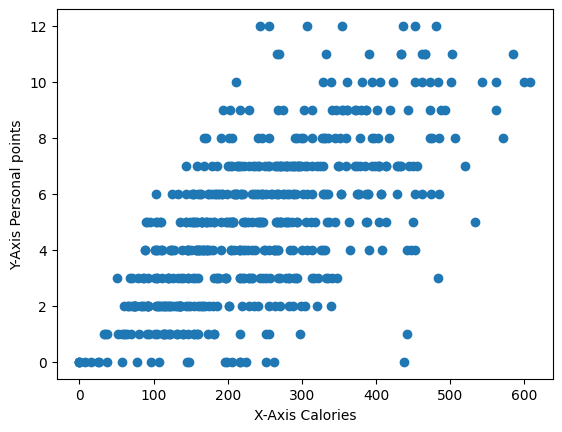

In [9]:
plt.scatter(data['calories'], data['personal_points'])
plt.xlabel('X-Axis Calories')
plt.ylabel('Y-Axis Personal points')
plt.show()

In [10]:
import seaborn as sns

<ipython-input-11-b403bfb652d7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


<Axes: >

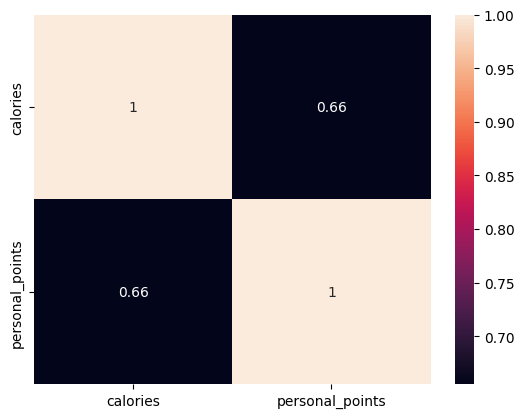

In [11]:
correlation=data.corr()
correlation
sns.heatmap(correlation,cbar=True,annot=True)

Calories distribution

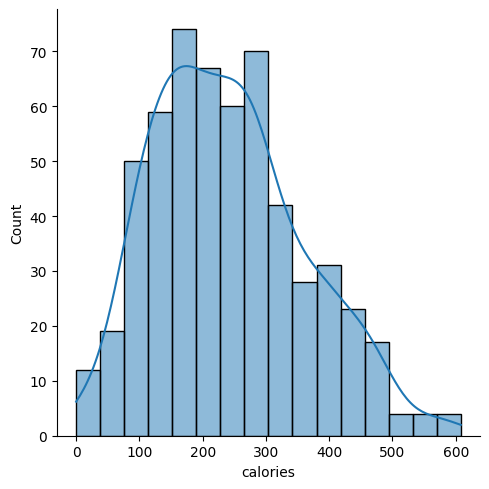

In [12]:
sns.displot (data['calories'],  kde=True)

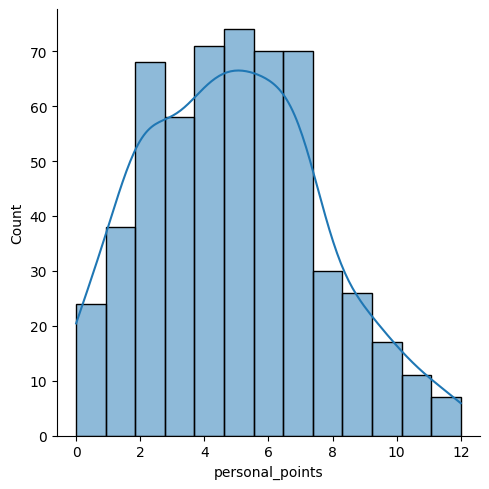

In [13]:
sns.displot (data['personal_points'],  kde=True)

In [14]:
data.dtypes

name                object
image               object
calories           float64
personal_points      int64
summary             object
recipe_keys         object
dtype: object

**Next, our target is to visualize the key distribution, which will obviously be categorical as it is not a numerical column. **

Here we split column based on category. First, I have created a new dataframe (Columns are a different category), and in each column, i assigned 1 if I found the recipe key or 0 if there was no matchng with the recipie key

In [15]:
# Iterate through rows
Air_Fryer_Recipes=0
new_df_rk =  pd.DataFrame(columns=['Kid Friendly','Air Fryer Recipes','Freezer Meals','Keto Recipes', 'Low Carb','Paleo','Slow Cooker Recipes', 'Vegetarian Meals','Dairy Free','Gluten Free','Meal Prep Recipes','Pressure Cooker Recipes','Under 30 Minutes','Whole30 Recipes'])
for index, row in data.iterrows():
     if str(row['recipe_keys']).find("Kid Friendly") == -1:
        new_df_rk.at[index, 'Kid Friendly'] = 0
        #new_df_rk = new_df_rk["Kid Friendly"].append ([[0]])
     else:
        new_df_rk.at[index, 'Kid Friendly'] = 1


     if str(row['recipe_keys']).find("Air Fryer Recipes") == -1:
        new_df_rk.at[index, 'Air Fryer Recipes'] = 0
     else:
        new_df_rk.at[index, 'Air Fryer Recipes'] = 1

     if str(row['recipe_keys']).find("Freezer Meals") == -1:
        new_df_rk.at[index, 'Freezer Meals'] = 0
     else:
        new_df_rk.at[index, 'Freezer Meals'] = 1

     if str(row['recipe_keys']).find("Keto Recipes") == -1:
        new_df_rk.at[index, 'Keto Recipes'] = 0
     else:
        new_df_rk.at[index, 'Keto Recipes'] = 1

     if str(row['recipe_keys']).find("Low Carb") == -1:
        new_df_rk.at[index, 'Low Carb'] = 0
     else:
        new_df_rk.at[index, 'Low Carb'] = 1

     if str(row['recipe_keys']).find("Paleo") == -1:
        new_df_rk.at[index, 'Paleo'] = 0
     else:
        new_df_rk.at[index, 'Paleo'] = 1

     if str(row['recipe_keys']).find("Slow Cooker Recipes") == -1:
        new_df_rk.at[index, 'Slow Cooker Recipes'] = 0
     else:
        new_df_rk.at[index, 'Slow Cooker Recipes'] = 1

     if str(row['recipe_keys']).find("Vegetarian Meals") == -1:
        new_df_rk.at[index, 'Vegetarian Meals'] = 0
     else:
        new_df_rk.at[index, 'Vegetarian Meals'] = 1

     if str(row['recipe_keys']).find("Dairy Free") == -1:
        new_df_rk.at[index, 'Dairy Free'] = 0
     else:
        new_df_rk.at[index, 'Dairy Free'] = 1

     if str(row['recipe_keys']).find("Gluten Free") == -1:
        new_df_rk.at[index, 'Gluten Free'] = 0
     else:
        new_df_rk.at[index, 'Gluten Free'] = 1

     if str(row['recipe_keys']).find("Meal Prep Recipes") == -1:
        new_df_rk.at[index, 'Meal Prep Recipes'] = 0
     else:
        new_df_rk.at[index, 'Meal Prep Recipes'] = 1

     if str(row['recipe_keys']).find("Pressure Cooker Recipes") == -1:
        new_df_rk.at[index, 'Pressure Cooker Recipes'] = 0
     else:
        new_df_rk.at[index, 'Pressure Cooker Recipes'] = 1

     if str(row['recipe_keys']).find("Under 30 Minutes") == -1:
        new_df_rk.at[index, 'Under 30 Minutess'] = 0
     else:
        new_df_rk.at[index, 'Under 30 Minutes'] = 1

     if str(row['recipe_keys']).find("Whole30 Recipes") == -1:
        new_df_rk.at[index, 'Whole30 Recipes'] = 0
     else:
        new_df_rk.at[index, 'Whole30 Recipes'] = 1

In [16]:
new_df_rk.fillna(0, inplace=True) #filled all null value with 0

In [17]:
new_df_rk = new_df_rk.astype(int) #changed the datatype as int

In [18]:
new_df_rk.dtypes

Kid Friendly               int64
Air Fryer Recipes          int64
Freezer Meals              int64
Keto Recipes               int64
Low Carb                   int64
Paleo                      int64
Slow Cooker Recipes        int64
Vegetarian Meals           int64
Dairy Free                 int64
Gluten Free                int64
Meal Prep Recipes          int64
Pressure Cooker Recipes    int64
Under 30 Minutes           int64
Whole30 Recipes            int64
Under 30 Minutess          int64
dtype: object

In [19]:
new_df_rk['Kid Friendly'].unique()

array([1, 0])

In [20]:
new_df_rk

,Kid Friendly,Air Fryer Recipes,Freezer Meals,Keto Recipes,Low Carb,Paleo,Slow Cooker Recipes,Vegetarian Meals,Dairy Free,Gluten Free,Meal Prep Recipes,Pressure Cooker Recipes,Under 30 Minutes,Whole30 Recipes,Under 30 Minutess
0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
560,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0
561,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
562,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
combined_df = pd.concat([data, new_df_rk],axis=1) #combined previous dataframe with newone for some visual presentation or finding new new relationship among variables
combined_df

,name,image,calories,personal_points,summary,recipe_keys,Kid Friendly,Air Fryer Recipes,Freezer Meals,Keto Recipes,...,Paleo,Slow Cooker Recipes,Vegetarian Meals,Dairy Free,Gluten Free,Meal Prep Recipes,Pressure Cooker Recipes,Under 30 Minutes,Whole30 Recipes,Under 30 Minutess
0,Pumpkin Chocolate Chip Cookies,https://www.skinnytaste.com/wp-content/uploads...,95.0,5,"These soft Pumpkin Chocolate Chip Cookies, mad...","Kid Friendly, Under 30 Minutes, Vegetarian Meals",1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,Coconut Curry Butternut Squash Soup,https://www.skinnytaste.com/wp-content/uploads...,108.0,2,"Coconut milk, curry and Indian spices complime...","Dairy Free, Gluten Free, Under 30 Minutes, Veg...",0,0,0,0,...,0,0,1,1,1,0,0,1,0,0
2,Pumpkin Bread Recipe,https://www.skinnytaste.com/wp-content/uploads...,103.0,5,Warm up your kitchen with the scent of pumpkin...,"Dairy Free, Vegetarian Meals",0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,Roasted Broccoli and Cauliflower,https://www.skinnytaste.com/wp-content/uploads...,163.0,4,This easy sheet pan roasted broccoli and cauli...,"Gluten Free, Kid Friendly, Under 30 Minutes",1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,Pumpkin Baked Oatmeal Cups,https://www.skinnytaste.com/wp-content/uploads...,104.0,2,"These creamy, pumpkin baked oatmeal cups are p...","Freezer Meals, Gluten Free, Meal Prep Recipes,...",0,0,1,0,...,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,Flourless Chocolate Zucchini Brownies,https://www.skinnytaste.com/wp-content/uploads...,179.0,7,These Flourless Zucchini Brownies are so fudgy...,"Gluten Free, Kid Friendly",1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
560,Foil Packet Spice Rubbed Fish with Watermelon ...,https://www.skinnytaste.com/wp-content/uploads...,314.0,3,"Spice Rubbed Fish is zesty and so flavorful, t...","Dairy Free, Gluten Free, Low Carb, Paleo, Unde...",0,0,0,0,...,1,0,0,1,1,0,0,1,1,0
561,Easy Crustless Spinach and Feta Pie,https://www.skinnytaste.com/wp-content/uploads...,126.0,3,Easy Crustless Spinach and Feta Pie is savory ...,"Freezer Meals, Kid Friendly, Under 30 Minutes,...",1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
562,Air Fryer Fried Shrimp Sandwich with Tartar Sauce,https://www.skinnytaste.com/wp-content/uploads...,352.0,6,Crispy air fryer shrimp served on a soft potat...,"Air Fryer Recipes, Kid Friendly",1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
combined_df.describe()

,calories,personal_points,Kid Friendly,Air Fryer Recipes,Freezer Meals,Keto Recipes,Low Carb,Paleo,Slow Cooker Recipes,Vegetarian Meals,Dairy Free,Gluten Free,Meal Prep Recipes,Pressure Cooker Recipes,Under 30 Minutes,Whole30 Recipes,Under 30 Minutess
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.0
mean,241.150709,4.895390,0.558511,0.115248,0.140071,0.161348,0.281915,0.063830,0.026596,0.446809,0.480496,0.734043,0.171986,0.033688,0.523050,0.122340,0.0
std,119.076995,2.769033,0.497006,0.319605,0.347369,0.368178,0.450331,0.244666,0.161042,0.497604,0.500063,0.442234,0.377703,0.180585,0.499912,0.327969,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,152.750000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,228.500000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,314.000000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,608.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


From the below heat map we can also say there is a very high chance if a paricular recipe is under the "Low Carb" categoy then it will be in "Keto Recipes" category.

<ipython-input-23-b03501483a2b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=combined_df.corr()


<Axes: >

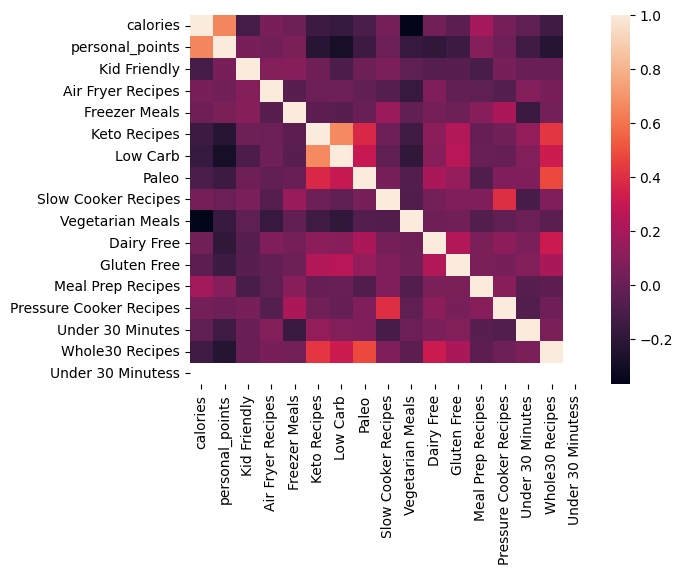

In [23]:
correlation=combined_df.corr()
correlation
sns.heatmap(correlation,cbar=True,annot=False)


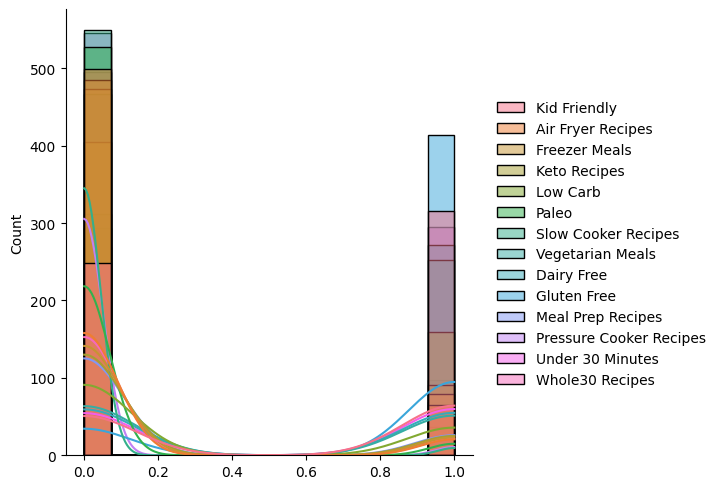

In [24]:
sns.displot (combined_df[['Kid Friendly','Air Fryer Recipes','Freezer Meals','Keto Recipes', 'Low Carb','Paleo','Slow Cooker Recipes', 'Vegetarian Meals','Dairy Free','Gluten Free','Meal Prep Recipes','Pressure Cooker Recipes','Under 30 Minutes','Whole30 Recipes']],  kde=True)

The previous distribution plot was quite hard to understand, so we developed the below bar chart for better understanding. We also can give a conclution of the categorical distribution like below

Text(0.5, 1.0, 'Categorical distribution')

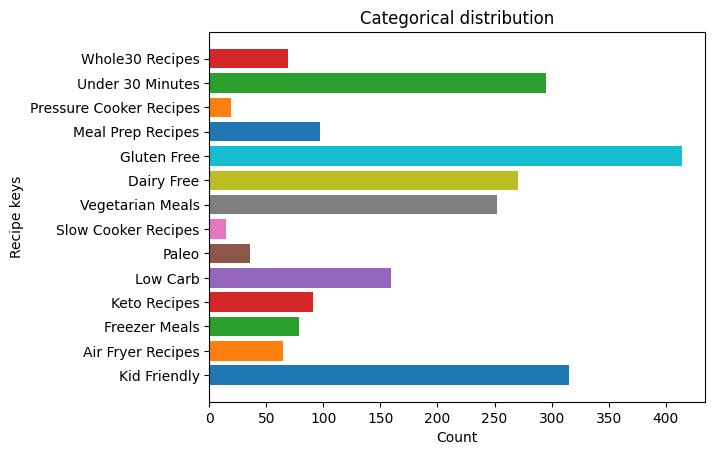

In [25]:
plt.barh('Kid Friendly', combined_df['Kid Friendly'].sum())
plt.barh('Air Fryer Recipes', combined_df['Air Fryer Recipes'].sum())
plt.barh('Freezer Meals', combined_df['Freezer Meals'].sum())
plt.barh('Keto Recipes', combined_df['Keto Recipes'].sum())
plt.barh('Low Carb', combined_df['Low Carb'].sum())
plt.barh('Paleo', combined_df['Paleo'].sum())
plt.barh('Slow Cooker Recipes', combined_df['Slow Cooker Recipes'].sum())
plt.barh('Vegetarian Meals', combined_df['Vegetarian Meals'].sum())
plt.barh('Dairy Free', combined_df['Dairy Free'].sum())
plt.barh('Gluten Free', combined_df['Gluten Free'].sum())
plt.barh('Meal Prep Recipes', combined_df['Meal Prep Recipes'].sum())
plt.barh('Pressure Cooker Recipes', combined_df['Pressure Cooker Recipes'].sum())
plt.barh('Under 30 Minutes', combined_df['Under 30 Minutes'].sum())
plt.barh('Whole30 Recipes', combined_df['Whole30 Recipes'].sum())

plt.xlabel('Count')
plt.ylabel('Recipe keys')
plt.title('Categorical distribution')


## Step 4: User input

In [26]:
#To show the images and other info as mentioned in the step 4 of the assignment
def print_recipes(recipes):
  for recipe in recipes:
    name = recipe[0]
    img_url = recipe[1]
    calories = recipe[2]
    summary = recipe[4]
    img = Image.open(BytesIO(requests.get(img_url).content))
    print('\n'+name)
    display(img)
    print(f'Calories: {calories}\nSummary: {summary}')

Min. calories? 100
Max. calories? 500
Min. points? 10
Max. points? 20

Air Fryer Asian Meatballs


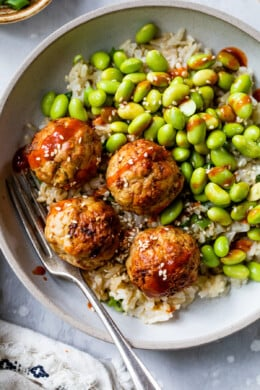

Calories: 483
Summary: Air Fryer Asian Turkey Meatballs with rice and edamame is a healthy meal for dinner or lunch and great for meal prep!

Scallops over Wilted Spinach Parmesan Risotto


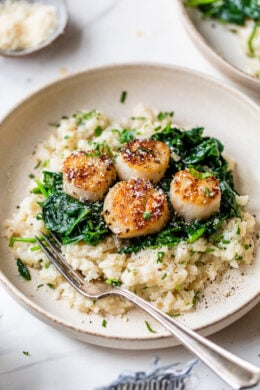

Calories: 481
Summary: Scallops over Wilted Spinach Parmesan Risotto

Baked Pumpkin Pasta with Pancetta, Gruyere, Kale, and White Beans


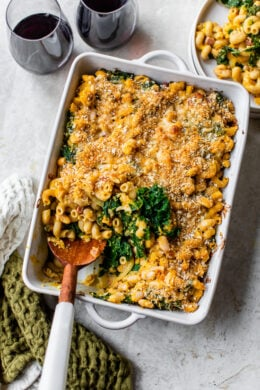

Calories: 473
Summary: This Baked Pumpkin Pasta is made with pancetta, kale, and white beans and topped with gruyere and panko crumbs. 

Mediterranean Meatballs


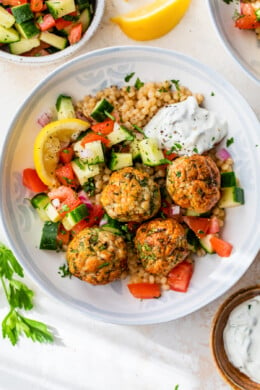

Calories: 466
Summary: Mediterranean Meatballs made with flavorful ground turkey meatballs served over Israeli couscous and a bright, lemony cucumber tomato salad. Make them in the air fryer or oven!

Leftover Turkey Harvest Cobb Salad


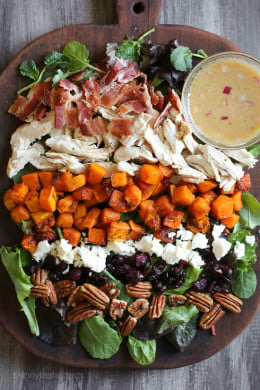

Calories: 466
Summary: Did you eat too much stuffing and pumpkin pie this Thanksgiving? Here's a wonderful way to use up any of that leftover turkey if you're looking for a meal that will be filling yet light.


In [27]:
#User input and filtering the data as in step 4 of the assignment
with open('/content/Recipes.csv', 'r', newline='') as csvfile:
    reader = list(csv.reader(csvfile))
    data = reader[1:] # Skip the header row
    filtered_data = []

    cal_start, cal_end = float(input("Min. calories? ")), float(input("Max. calories? "))
    points_start, points_end = float(input("Min. points? ")), float(input("Max. points? "))
    for row in data:
      calories = float(row[2])
      personal_points = float(row[3])

      if cal_start <= calories <= cal_end and points_start <= personal_points <= points_end:
          filtered_data.append(row)

    sorted_data = sorted(filtered_data, key=lambda row: (float(row[2]), float(row[3])), reverse=True)
    print_recipes(sorted_data[:5])